In [1]:
from ultralytics import YOLO
import cv2
import pytesseract
import matplotlib.pyplot as plt
import re
# Ruta a Tesseract en Windows (ajústala si es necesario)
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [22]:
def leer_placa_con_ocr(img, box, show_steps=False):
    """
    Extrae el número de placa usando Tesseract OCR desde una imagen y bounding box.

    Parámetros:
    - img: imagen original (BGR, de OpenCV)
    - box: lista o tupla con coordenadas (x1, y1, x2, y2)
    - show_steps: si es True, muestra el recorte y procesamiento

    Retorna:
    - texto_detectado (str)
    - imagen_preprocesada (opcional)
    """

    x1, y1, x2, y2 = map(int, box)
   # Altura
    h = y2 - y1
    delta_y = int(h * 0.30)
    y1_crop = max(y1 + delta_y, 0)
    y2_crop = min(y2-5, img.shape[0])

    # Ancho
    w = x2 - x1
    delta_x = int(w * 0.04)
    x1_crop = max(x1 + delta_x, 0)
    x2_crop = min(x2 - delta_x, img.shape[1])

    # Recorte ajustado
    placa_crop = img[y1_crop:y2_crop, x1_crop:x2_crop]

    # 1. Convertir a escala de grises
    gray = cv2.cvtColor(placa_crop, cv2.COLOR_BGR2GRAY)

    # 2. Mejorar contraste
    gray = cv2.equalizeHist(gray)

    # 3. Quitar ruido
    gray = cv2.GaussianBlur(gray, (3, 3), 0)

    # 4. Binarización adaptativa
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    # 5. OCR con configuración robusta
    config = "--psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
    raw_text = pytesseract.image_to_string(thresh, config=config)

    # 6. Limpiar texto
    texto_limpio = re.sub(r'[^A-Z0-9]', '', raw_text.upper())

    # Mostrar pasos (opcional)
    if show_steps:
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(placa_crop, cv2.COLOR_BGR2RGB))
        plt.title("Recorte original")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(thresh, cmap='gray')
        plt.title("Procesamiento para OCR")
        plt.axis("off")

        plt.suptitle(f"OCR detectado: {texto_limpio}")
        plt.show()

    return texto_limpio


In [1]:


# Cargar el modelo entrenado
#peru_plate_numbers_detection/runs/detect/yolo_car_detector2/weights/best.pt
model = YOLO("runs/detect//yolo_car_detector2/weights/best.pt")

# Leer la imagen
image_path = r"D:\programacion\proyectos\utec\IA\modulo_2_redes_convolucionales_y_generativas\yolo_ultralytics\peru_plate_numbers_detection_v2\dataset\valid\images\20231009_194712_jpg.rf.b2160651d32351fecff493910362ce0d.jpg"
# Leer imagen
img = cv2.imread(image_path)

# Inferencia con YOLO
results = model(img)

# Extraer placas y leer con OCR
for r in results:
    for box in r.boxes:
        texto = leer_placa_con_ocr(img, box.xyxy[0], show_steps=True)
        print("🟩 Texto leído:", texto)



NameError: name 'YOLO' is not defined

In [24]:
import cv2
import numpy as np

def letterbox(image, target_size=(640, 640), color=(114, 114, 114)):
    h, w = image.shape[:2]
    new_w, new_h = target_size

    # Escala la imagen manteniendo aspecto
    scale = min(new_w / w, new_h / h)
    resize_w = int(w * scale)
    resize_h = int(h * scale)

    image_resized = cv2.resize(image, (resize_w, resize_h), interpolation=cv2.INTER_LINEAR)

    # Calcula el padding
    pad_w = new_w - resize_w
    pad_h = new_h - resize_h
    top = pad_h // 2
    bottom = pad_h - top
    left = pad_w // 2
    right = pad_w - left

    # Aplica padding
    image_padded = cv2.copyMakeBorder(
        image_resized, top, bottom, left, right,
        cv2.BORDER_CONSTANT, value=color
    )

    return image_padded, scale, (left, top)


# Testing 2


0: 480x640 1 placa, 13.6ms
Speed: 3.7ms preprocess, 13.6ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


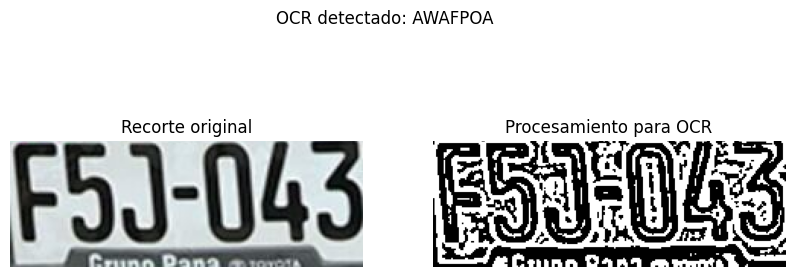

🟩 Texto leído: AWAFPOA


In [25]:
image_path = r"D:\programacion\proyectos\utec\IA\modulo_2_redes_convolucionales_y_generativas\yolo_ultralytics\peru_plate_numbers_detection_v2\assets\testing.jpg"
# Leer imagen
img = cv2.imread(image_path)
img_ready, scale, padding = letterbox(img, target_size=(960, 960))
# Inferencia con YOLO
results = model(img)

# Extraer placas y leer con OCR
for r in results:
    for box in r.boxes:
        texto = leer_placa_con_ocr(img, box.xyxy[0], show_steps=True)
        print("🟩 Texto leído:", texto)